# REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") # supress warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#READING DATA

In [3]:
data = pd.read_csv(r"/content/drive/MyDrive/PreparedClinicalData.csv")
# data = pd.read_csv("PreparedMNCData.csv")
# data = pd.read_csv("PreparedClinicalData.csv")

In [4]:
data.head()

,Unnamed: 0,ReportId,StateId,DistrictId,DistrictName,TalukaId,MncHospitalId,MncVisiteDate,ReportingMonthyear,ReportingDate,...,CreatedDate,IsMnc,Manochaitanya,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
0,0,21,17,3,Bangalore Urban,298.0,NaN,NaN,2017-04-01,2017-08-09,...,2017-08-09,0,N,75.0,64.0,13.0,126.0,139.0,0.0,139.0
1,1,22,17,45,Bbmp,297.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,3.0,4.0,2.0,6.0,0.0,6.0
2,2,23,17,45,Bbmp,296.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24,17,45,Bbmp,295.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,3.0,0.0,1.0,2.0,3.0,0.0,3.0
4,4,25,17,45,Bbmp,294.0,NaN,NaN,2017-04-01,2017-10-06,...,2017-10-06,0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#TEXT PRE-PROCESSING

In [5]:
data['MncVisiteDate'] = pd.to_datetime(data['MncVisiteDate'],  errors='coerce', format='%Y-%m-%d')
data['ReportingMonthyear'] = pd.to_datetime(data['ReportingMonthyear'],  errors='coerce', format='%Y-%m-%d')

In [6]:
data.shape

(49335, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49335 entries, 0 to 49334
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Unnamed: 0                            49335 non-null  int64         
 1   ReportId                              49335 non-null  int64         
 2   StateId                               49335 non-null  int64         
 3   DistrictId                            49335 non-null  int64         
 4   DistrictName                          49335 non-null  object        
 5   TalukaId                              49323 non-null  float64       
 6   MncHospitalId                         10794 non-null  float64       
 7   MncVisiteDate                         10791 non-null  datetime64[ns]
 8   ReportingMonthyear                    49335 non-null  datetime64[ns]
 9   ReportingDate                         49335 non-null  object        
 10

In [8]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [9]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [10]:
data.set_index(('MncVisiteDate'), inplace = True)
data.index

DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT',
               ...
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=49335, freq=None)

In [11]:
data.describe()

,Unnamed: 0,ReportId,StateId,DistrictId,TalukaId,MncHospitalId,old_smd_male,old_smd_female,new_smd_male,new_smd_female,...,InPatient_12,FacilityId,IsMnc,total_male,total_female,total_new,total_old,total_op,total_ip,TotalVisitedPatients
count,49335.000000,49335.000000,49335.0,49335.000000,49323.000000,10794.000000,49335.000000,49335.000000,49335.000000,49335.000000,...,49333.000000,38539.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000,49335.000000
mean,24667.000000,29532.193615,17.0,23.836607,142.113679,200.855012,6.387027,5.478869,1.436951,1.264032,...,0.008919,1420.966190,0.270923,39.519165,31.485700,14.943894,47.124739,71.004865,0.544279,73.284828
std,14241.932102,21283.428045,0.0,13.076381,90.790445,156.538894,26.229063,20.829407,6.983477,6.144499,...,1.160917,991.173439,0.553331,132.402065,90.932028,57.129103,163.971607,216.364867,11.719208,226.122560
min,0.000000,21.000000,17.0,1.000000,0.000000,101.000000,-3.000000,-8.000000,-3.000000,-2.000000,...,-9.000000,0.000000,0.000000,-13.000000,-11.000000,-10.000000,-19.000000,-20.000000,-17.000000,-20.000000
25%,12333.500000,12480.500000,17.0,15.000000,108.000000,151.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,518.000000,0.000000,4.000000,3.000000,0.000000,3.000000,7.000000,0.000000,7.000000
50%,24667.000000,26518.000000,17.0,21.000000,147.000000,194.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1341.000000,0.000000,10.000000,9.000000,2.000000,11.000000,20.000000,0.000000,21.000000
75%,37000.500000,39852.500000,17.0,34.000000,210.000000,241.000000,4.000000,3.000000,1.000000,1.000000,...,0.000000,2499.000000,0.000000,26.000000,23.000000,11.000000,31.000000,49.000000,0.000000,50.000000
max,49334.000000,77007.000000,17.0,45.000000,298.000000,4020.000000,1017.000000,941.000000,502.000000,509.000000,...,253.000000,2892.000000,3.000000,11849.000000,4317.000000,2138.000000,11834.000000,11860.000000,1056.000000,11860.000000


In [12]:
helpfuldata = pd.DataFrame()
helpfuldata = data[["TotalVisitedPatients", "DistrictId", "TalukaId", "ReportingMonthyear"]]
helpfuldata

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139.0,3,298.0,2017-04-01
NaT,6.0,45,297.0,2017-04-01
NaT,0.0,45,296.0,2017-04-01
NaT,3.0,45,295.0,2017-04-01
NaT,0.0,45,294.0,2017-04-01
...,...,...,...,...
NaT,0.0,29,196.0,2020-08-01
NaT,6.0,41,260.0,2020-08-01
NaT,57.0,37,238.0,2020-08-01


In [13]:
helpfuldata.sort_values("MncVisiteDate")

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
2013-01-04,46.0,19,0.0,2019-01-01
2014-02-19,40.0,29,0.0,2019-02-01
2015-12-12,16.0,31,0.0,2018-12-01
2016-05-24,6.0,29,0.0,2019-05-01
2016-09-11,28.0,21,0.0,2018-09-01
...,...,...,...,...
NaT,0.0,29,196.0,2020-08-01
NaT,6.0,41,260.0,2020-08-01
NaT,57.0,37,238.0,2020-08-01


In [14]:
data['TotalVisitedPatients'].describe()

count    49335.000000
mean        73.284828
std        226.122560
min        -20.000000
25%          7.000000
50%         21.000000
75%         50.000000
max      11860.000000
Name: TotalVisitedPatients, dtype: float64

In [15]:
data['TotalVisitedPatients'].isnull().sum()

0

In [16]:
data.TotalVisitedPatients.isna().any()

False

In [17]:
check_for_nan = data['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 49335, dtype: bool


In [18]:
cols = ['TotalVisitedPatients']
helpfuldata[cols] = helpfuldata[cols].applymap(np.int64)

In [19]:
helpfuldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49335 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  49335 non-null  int64         
 1   DistrictId            49335 non-null  int64         
 2   TalukaId              49323 non-null  float64       
 3   ReportingMonthyear    49335 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 MB


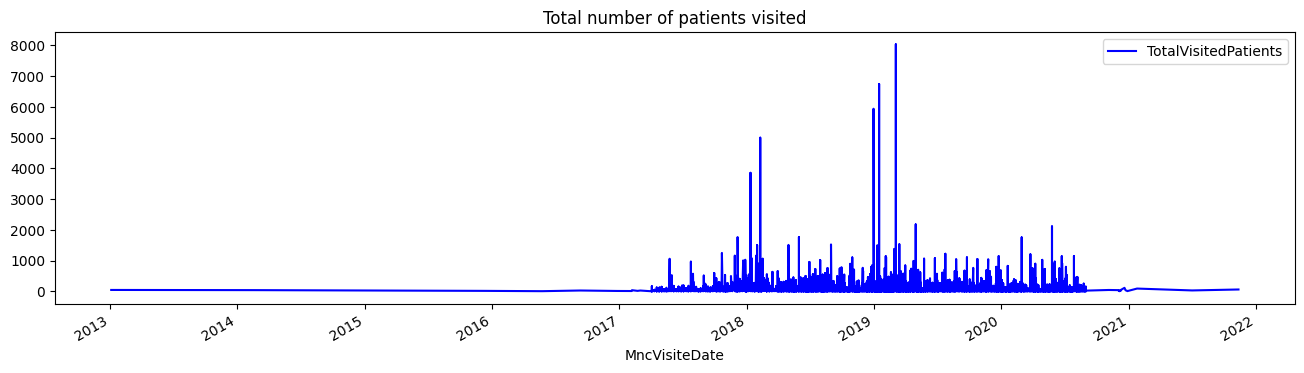

In [20]:
helpfuldata.plot(kind='line', y='TotalVisitedPatients',color='blue', figsize=(16, 4) )
plt.legend(loc='best')
plt.title('Total number of patients visited')
plt.show()

# CHOOSING DISTRICT

In [21]:
print(helpfuldata['DistrictId'].max())
print(helpfuldata['DistrictId'].min())

45
1


In [22]:
dist = helpfuldata[helpfuldata['DistrictId']==3]

In [23]:
dist.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139,3,298.0,2017-04-01
NaT,144,3,114.0,2017-04-01
NaT,238,3,113.0,2017-04-01
NaT,108,3,112.0,2017-04-01
NaT,154,3,115.0,2017-05-01


In [24]:
mnc_monthly = pd.DataFrame()

In [25]:
mnc_monthly = dist

In [26]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, NaT to NaT
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TotalVisitedPatients  3338 non-null   int64         
 1   DistrictId            3338 non-null   int64         
 2   TalukaId              3338 non-null   float64       
 3   ReportingMonthyear    3338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 130.4 KB


In [27]:
mnc_monthly.head()

,TotalVisitedPatients,DistrictId,TalukaId,ReportingMonthyear
MncVisiteDate,,,,
NaT,139,3,298.0,2017-04-01
NaT,144,3,114.0,2017-04-01
NaT,238,3,113.0,2017-04-01
NaT,108,3,112.0,2017-04-01
NaT,154,3,115.0,2017-05-01


In [28]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,3338.000000,3338.0,3338.000000
mean,47.289694,3.0,131.040743
std,214.028838,0.0,83.369123
min,-8.000000,3.0,0.000000
25%,11.000000,3.0,113.000000
50%,29.000000,3.0,114.000000
75%,51.000000,3.0,114.000000
max,11860.000000,3.0,298.000000


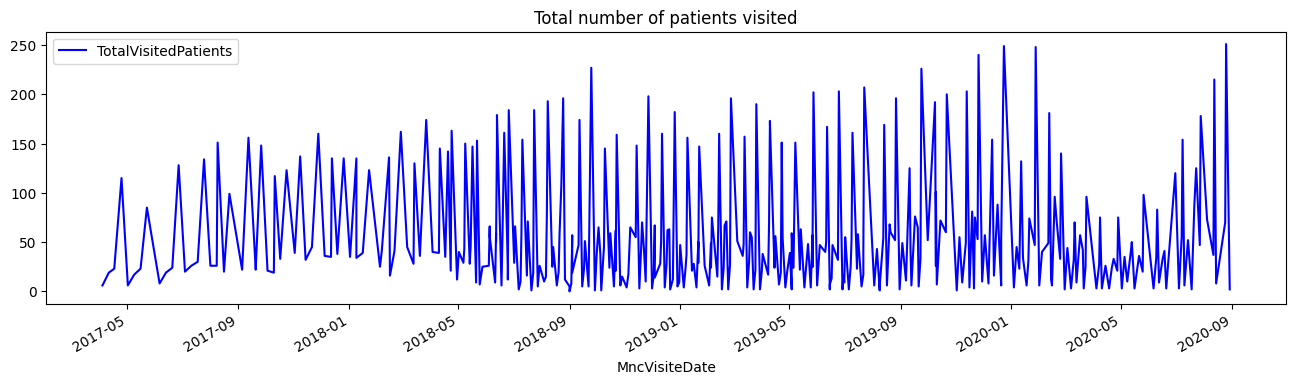

In [29]:
mnc_monthly.plot(y='TotalVisitedPatients',color='blue', figsize=(16, 4) )
plt.legend(loc='best')
plt.title('Total number of patients visited')
plt.show()

# Outlier warning module
Percentile : The percent of population which lies below that value

Quantile : The cut points dividing the range of probability distribution into continuous intervals with equal probability. There are q-1 of q quantiles one of each k satisfying 0 < k < q

Quartile : Quartile is a special case of quantile, quartiles cut the data set into four equal parts i.e. q=4 for quantiles so we have First quartile Q1, second quartile Q2(Median) and third quartile Q3

Quartile First quartile The first quartile is determined by No of elements ×(1/4). It is the rank in the population (from least to greatest values) at which approximately 1/4 of the values are less than the value of the first quartile.

In [30]:
Q0 = mnc_monthly.TotalVisitedPatients.quantile(0)
Q1 = mnc_monthly.TotalVisitedPatients.quantile(0.25)
Q3 = mnc_monthly.TotalVisitedPatients.quantile(0.75)
IQR = Q3 - Q1

In [31]:
print(IQR)
print(Q0)
print(Q1)
print(Q3)

40.0
-8.0
11.0
51.0


In [32]:
min_value = Q1 - 1.5 * IQR
if(min_value<0):
  min_value = 0
print(min_value)

max_value = Q3 + 1.5 * IQR
print(max_value)

0
111.0


In [33]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,3338.000000,3338.0,3338.000000
mean,47.289694,3.0,131.040743
std,214.028838,0.0,83.369123
min,-8.000000,3.0,0.000000
25%,11.000000,3.0,113.000000
50%,29.000000,3.0,114.000000
75%,51.000000,3.0,114.000000
max,11860.000000,3.0,298.000000


In [34]:
mnc_monthly = mnc_monthly[mnc_monthly["TotalVisitedPatients"]>-1]
mnc_monthly = mnc_monthly[mnc_monthly["TotalVisitedPatients"]<max_value]

In [35]:
mnc_monthly.describe()

,TotalVisitedPatients,DistrictId,TalukaId
count,3088.000000,3088.0,3088.000000
mean,30.913212,3.0,133.594560
std,24.674235,0.0,82.559761
min,0.000000,3.0,0.000000
25%,10.000000,3.0,113.000000
50%,26.000000,3.0,114.000000
75%,45.000000,3.0,114.000000
max,110.000000,3.0,298.000000


# ADJUSTING MNC_MONTHLY

In [36]:
mnc_monthly.drop(['DistrictId', 'DistrictId','ReportingMonthyear', 'TalukaId'],axis = 1, inplace = True)

In [37]:
mnc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3088 entries, NaT to NaT
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TotalVisitedPatients  3088 non-null   int64
dtypes: int64(1)
memory usage: 48.2 KB


In [38]:
mnc_monthly

,TotalVisitedPatients
MncVisiteDate,
NaT,108
NaT,76
NaT,92
NaT,76
NaT,52
...,...
NaT,9
NaT,47
NaT,0


In [39]:
mnc_monthly['TotalVisitedPatients'].isnull().sum()

0

In [40]:
mnc_monthly.TotalVisitedPatients.isna().any()

False

In [41]:
check_for_nan = mnc_monthly['TotalVisitedPatients'].isnull()
print (check_for_nan)

MncVisiteDate
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
       ...  
NaT    False
NaT    False
NaT    False
NaT    False
NaT    False
Name: TotalVisitedPatients, Length: 3088, dtype: bool


In [42]:
mnc_monthly.index

DatetimeIndex([       'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT', '2017-04-17', '2017-04-04', '2017-05-02',
               '2017-06-06', '2017-07-04',
               ...
               '2020-08-11', '2020-08-24', '2020-08-14', '2020-08-29',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='MncVisiteDate', length=3088, freq=None)

In [43]:
mnc_monthly.head()

,TotalVisitedPatients
MncVisiteDate,
NaT,108
NaT,76
NaT,92
NaT,76
NaT,52


In [44]:
mnc_monthly = mnc_monthly.resample('M').sum()

In [45]:
mnc_monthly

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,48
2017-05-31,131
2017-06-30,51
2017-07-31,76
2017-08-31,171
2017-09-30,67
2017-10-31,73
2017-11-30,116
2017-12-31,109


In [46]:
mnc_monthly.describe()

,TotalVisitedPatients
count,41.000000
mean,249.487805
std,114.225681
min,48.000000
25%,147.000000
50%,270.000000
75%,343.000000
max,428.000000


In [47]:
smallest10 = mnc_monthly.nsmallest(10, ['TotalVisitedPatients'])
smallest10

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,48
2017-06-30,51
2017-09-30,67
2017-10-31,73
2017-07-31,76
2017-12-31,109
2018-03-31,109
2017-11-30,116
2018-02-28,123


In [48]:
largest10 = mnc_monthly.nlargest(10, ['TotalVisitedPatients'])
largest10

,TotalVisitedPatients
MncVisiteDate,
2018-06-30,428
2019-02-28,427
2019-05-31,397
2020-03-31,381
2018-10-31,379
2018-08-31,376
2018-11-30,376
2018-12-31,364
2019-10-31,354


In [49]:
print(mnc_monthly)

               TotalVisitedPatients
MncVisiteDate                      
2017-04-30                       48
2017-05-31                      131
2017-06-30                       51
2017-07-31                       76
2017-08-31                      171
2017-09-30                       67
2017-10-31                       73
2017-11-30                      116
2017-12-31                      109
2018-01-31                      147
2018-02-28                      123
2018-03-31                      109
2018-04-30                      147
2018-05-31                      227
2018-06-30                      428
2018-07-31                      304
2018-08-31                      376
2018-09-30                      221
2018-10-31                      379
2018-11-30                      376
2018-12-31                      364
2019-01-31                      270
2019-02-28                      427
2019-03-31                      310
2019-04-30                      326
2019-05-31                  

#PLOTTING GRAPHS OF TOTAL VISITED PATIENTS

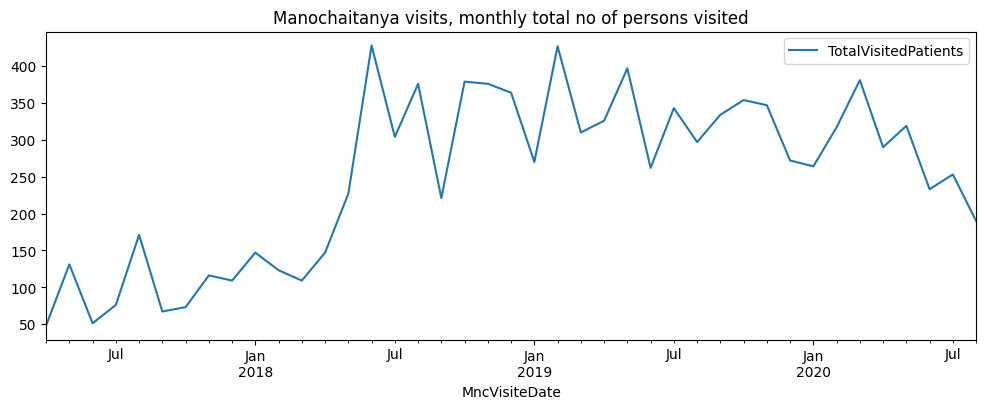

In [50]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya visits, monthly total no of persons visited')
plt.show()

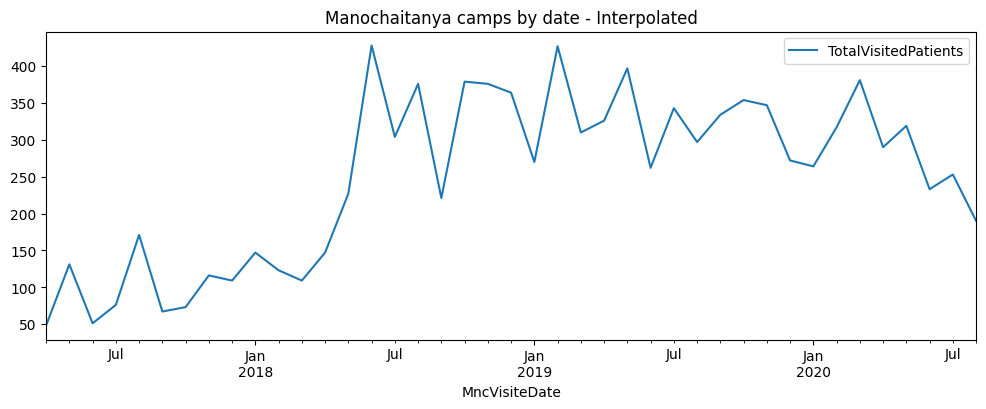

In [51]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Interpolated')
plt.show()

In [52]:
mnc_monthly['TotalVisitedPatients'].replace(to_replace=0, method='ffill', inplace = True)
# Impute the values with the previous value

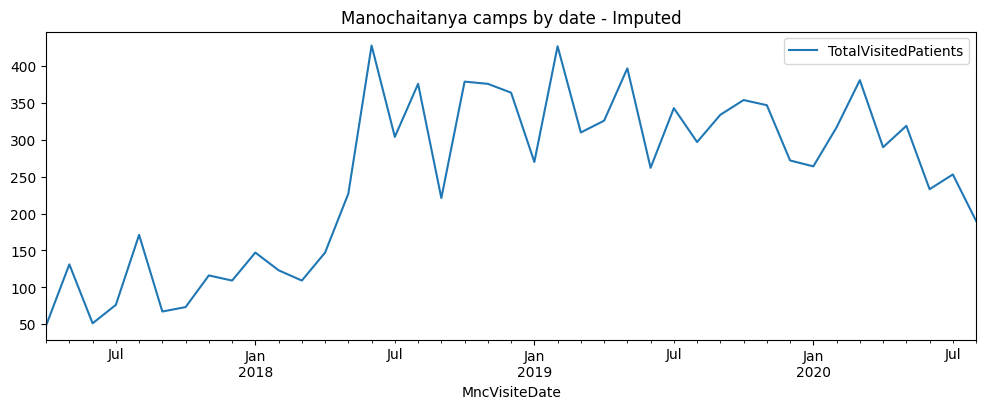

In [53]:
mnc_monthly.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Manochaitanya camps by date - Imputed')
plt.show()

#AUTO CORELATION AND PARTIAL AUTOCORELATION

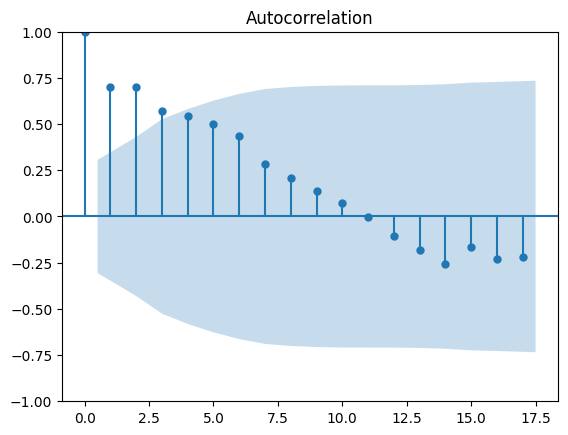

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mnc_monthly);

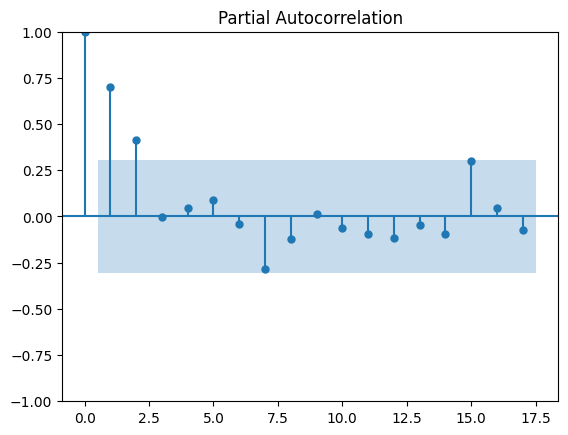

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(mnc_monthly);

#TIME SERIES GRAPH

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(mnc_monthly['TotalVisitedPatients'],model='additive', period=1)
sd

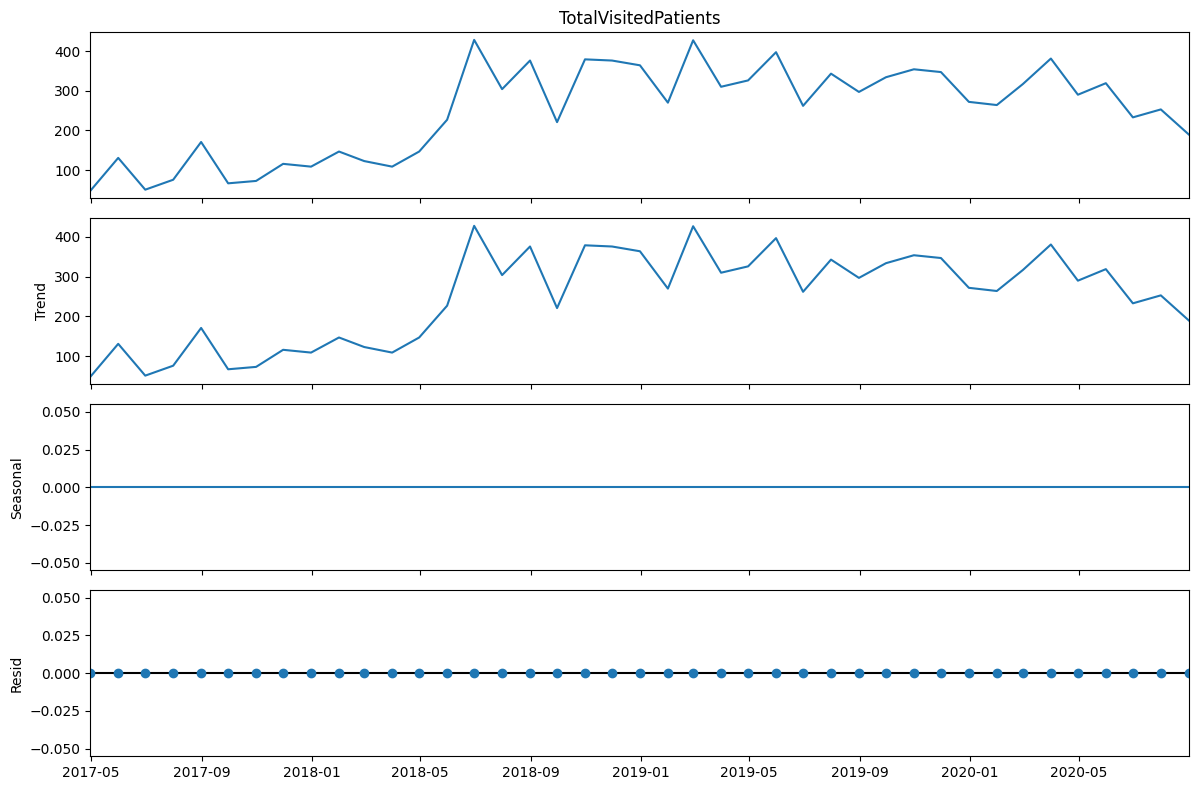

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose

fig = sd.plot()
plt.show()

####Time series of total patient visits to hospitals.
Decomposing the time series: It can be observed that there is a trend but there is no seasonality

#OUT OF SAMPLE FORECASTING (OOSF)

In [58]:
mnc_monthly.tail(1)

,TotalVisitedPatients
MncVisiteDate,
2020-08-31,190


In [59]:
mnc_monthly.tail(1).index[0]

Timestamp('2020-08-31 00:00:00')

In [60]:
mnc_monthly.tail(1).index[0] + pd.DateOffset(months=1)

Timestamp('2020-09-30 00:00:00')

In [61]:
len(mnc_monthly['TotalVisitedPatients'])

41

In [62]:

total_months = len(mnc_monthly['TotalVisitedPatients'])
test_len = 6
train_len = total_months - test_len
train = mnc_monthly[0:train_len]
test= mnc_monthly[train_len :total_months]
# Populate the OOSF months with default values of forecast
# Choose the last six months as test

In [63]:
train

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,48
2017-05-31,131
2017-06-30,51
2017-07-31,76
2017-08-31,171
2017-09-30,67
2017-10-31,73
2017-11-30,116
2017-12-31,109


In [64]:
test

,TotalVisitedPatients
MncVisiteDate,
2020-03-31,381
2020-04-30,290
2020-05-31,319
2020-06-30,233
2020-07-31,253
2020-08-31,190


In [65]:
train["TotalVisitedPatients"][-1]

317

In [66]:
oosf_months=1
oosf_end_month = total_months + oosf_months

In [67]:
mnc_monthly_mean = mnc_monthly['TotalVisitedPatients'].mean()
mnc_monthly_mean

249.4878048780488

In [68]:
train_test = mnc_monthly[0:total_months]
train_test_len = len(mnc_monthly[0:total_months])
train_test_len

41

In [69]:
from datetime import timedelta
for i in range(total_months,oosf_end_month):
    idx = mnc_monthly.tail(1).index[0] + pd.DateOffset(months=1)
    mnc_monthly.loc[idx] = mnc_monthly_mean

In [70]:
train_test

,TotalVisitedPatients
MncVisiteDate,
2017-04-30,48
2017-05-31,131
2017-06-30,51
2017-07-31,76
2017-08-31,171
2017-09-30,67
2017-10-31,73
2017-11-30,116
2017-12-31,109


In [71]:
mnc_monthly.tail(14)

,TotalVisitedPatients
MncVisiteDate,
2019-08-31,297.000000
2019-09-30,334.000000
2019-10-31,354.000000
2019-11-30,347.000000
2019-12-31,272.000000
2020-01-31,264.000000
2020-02-29,317.000000
2020-03-31,381.000000
2020-04-30,290.000000


In [72]:
oosf = mnc_monthly[total_months : total_months + oosf_months]
oosf

,TotalVisitedPatients
MncVisiteDate,
2020-09-30,249.487805


#MAPE CALCULATION METHODS
### Method Name
  #### a) Applying the Model
  #### b) Plotting the graph
  #### c) Calculation for MAPE (Mean absolute percentage error)
  #### d) Cumulative Results for MAPE

###1. NAVIE METHOD

#### a) Applying the Model

In [73]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['TotalVisitedPatients'][train_len-1]

In [74]:
y_hat_oos_naive= oosf.copy()
y_hat_oos_naive['oos_naive_forecast'] = train_test['TotalVisitedPatients'][total_months-1]

In [75]:
y_hat_oos_naive

,TotalVisitedPatients,oos_naive_forecast
MncVisiteDate,,
2020-09-30,249.487805,190


#### b) Plotting the graph

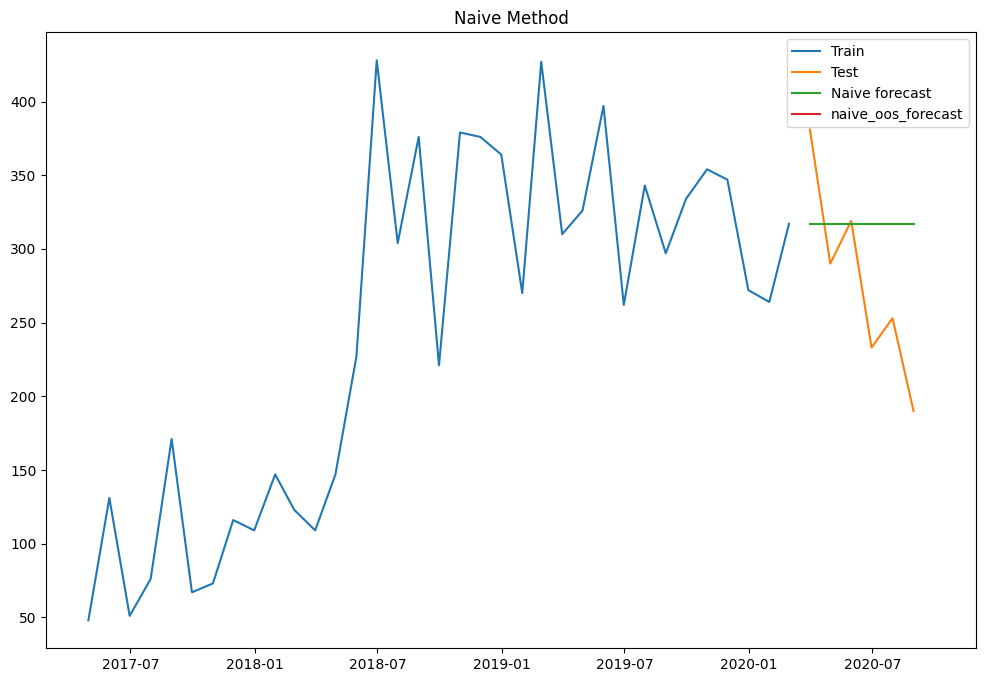

In [76]:
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.plot(y_hat_oos_naive['oos_naive_forecast'],label='naive_oos_forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}

In [77]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_naive['naive_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [78]:
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape]})
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82


### 2. SIMPLE AVERAGE



####a) Applying the Model

In [79]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['TotalVisitedPatients'].mean()
y_hat_avg

,TotalVisitedPatients,avg_forecast
MncVisiteDate,,
2020-03-31,381,244.657143
2020-04-30,290,244.657143
2020-05-31,319,244.657143
2020-06-30,233,244.657143
2020-07-31,253,244.657143
2020-08-31,190,244.657143


In [80]:
y_hat_oos_avg= oosf.copy()
y_hat_oos_avg['oos_avg_forecast'] = train_test['TotalVisitedPatients'].mean()

In [81]:
y_hat_oos_avg

,TotalVisitedPatients,oos_avg_forecast
MncVisiteDate,,
2020-09-30,249.487805,249.487805


#### b) Plotting the graph

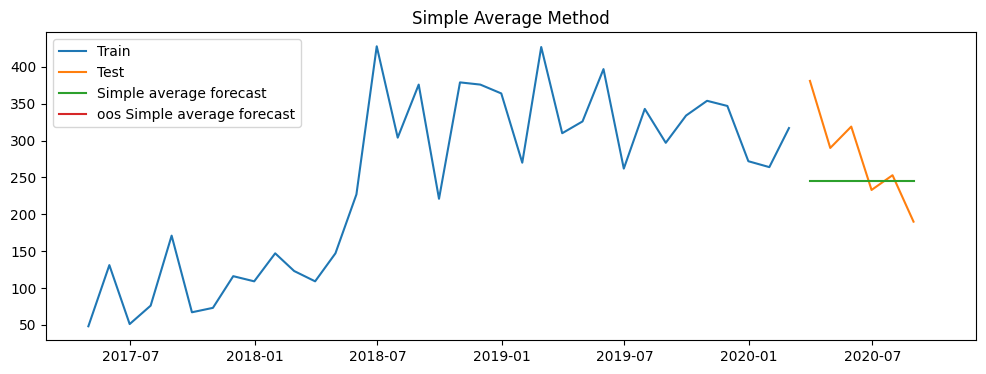

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.plot(y_hat_oos_avg['oos_avg_forecast'], label = 'oos Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}

In [83]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_avg['avg_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [84]:
tempResults = pd.DataFrame({'Method':['Simple average method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63


### 3. SIMPLE MOVING AVERAGE

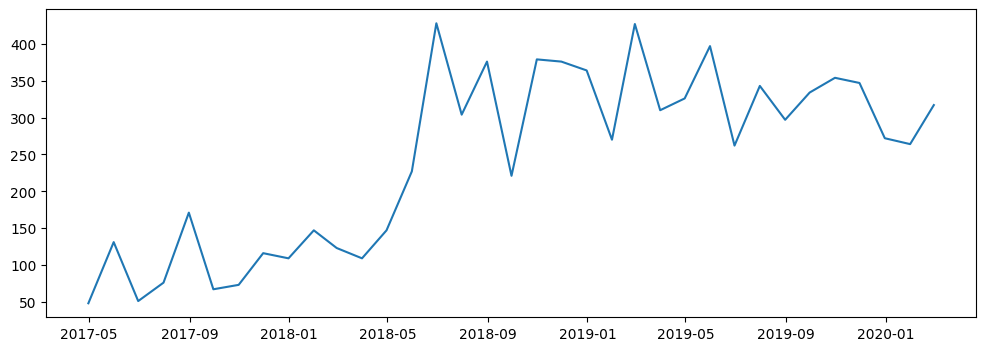

In [85]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='TotalVisitedPatients')

#### a) Applying the Model
  

In [86]:
y_hat_sma = mnc_monthly.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()

In [87]:
y_hat_sma

,TotalVisitedPatients,sma_forecast
MncVisiteDate,,
2017-04-30,48.000000,NaN
2017-05-31,131.000000,NaN
2017-06-30,51.000000,76.666667
2017-07-31,76.000000,86.000000
2017-08-31,171.000000,99.333333
2017-09-30,67.000000,104.666667
2017-10-31,73.000000,103.666667
2017-11-30,116.000000,85.333333
2017-12-31,109.000000,99.333333


In [88]:
y_hat_oos_sma = oosf.copy()
ma_window = 3
y_hat_oos_sma['oos_sma_forecast'] = mnc_monthly['TotalVisitedPatients'].rolling(ma_window).mean()

In [89]:
y_hat_oos_sma

,TotalVisitedPatients,oos_sma_forecast
MncVisiteDate,,
2020-09-30,249.487805,230.829268


#### b) Plotting the graph
  

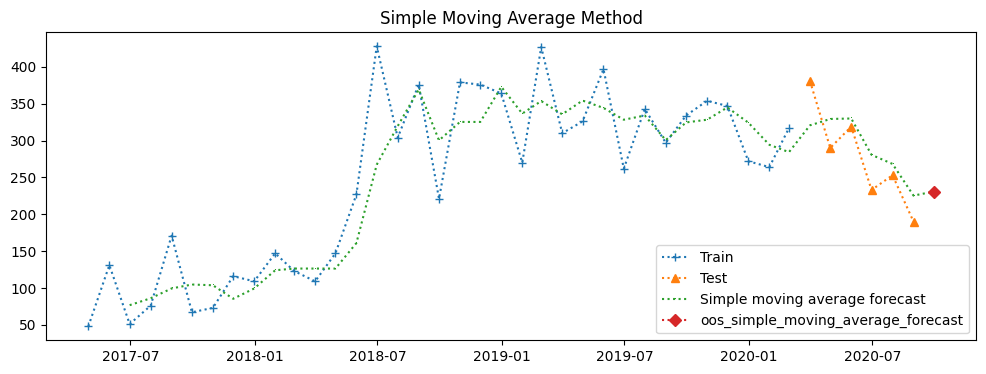

In [90]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train', marker ='+', linestyle = 'dotted')
plt.plot(test['TotalVisitedPatients'], label='Test', marker ='^', linestyle = 'dotted')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast', marker= ',', linestyle = 'dotted')
plt.plot(y_hat_oos_sma['oos_sma_forecast'],label='oos_simple_moving_average_forecast', marker = 'D', linestyle = 'dotted')
plt.plot(marker='o')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [91]:
y_hat_sma['sma_forecast'][len(train):] = y_hat_sma['sma_forecast'][len(train)-1]
y_hat_test = y_hat_sma['sma_forecast'][len(train):len(train)+len(test)]
y_hat_test

MncVisiteDate
2020-03-31    284.333333
2020-04-30    284.333333
2020-05-31    284.333333
2020-06-30    284.333333
2020-07-31    284.333333
2020-08-31    284.333333
Name: sma_forecast, dtype: float64

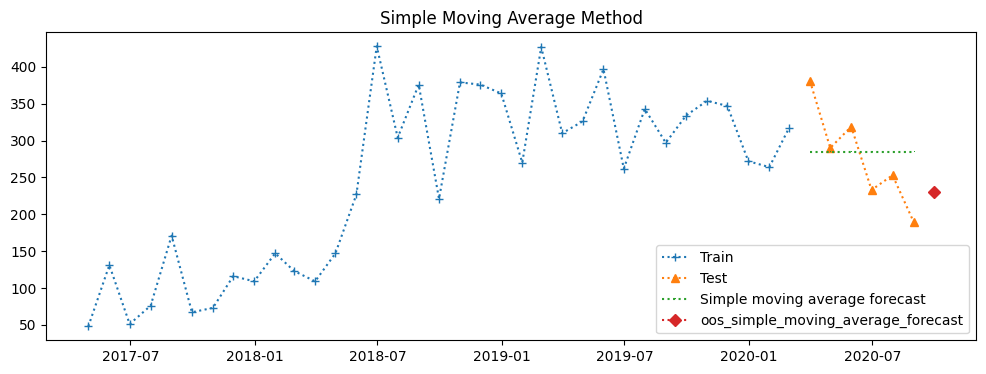

In [92]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train', marker ='+', linestyle = 'dotted')
plt.plot(test['TotalVisitedPatients'], label='Test', marker ='^', linestyle = 'dotted')
plt.plot(y_hat_test, label='Simple moving average forecast', marker= ',', linestyle = 'dotted')
plt.plot(y_hat_oos_sma['oos_sma_forecast'],label='oos_simple_moving_average_forecast', marker = 'D', linestyle = 'dotted')
plt.plot(marker='o')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)


In [93]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_test)/test['TotalVisitedPatients'])*100,2)

 #### d) Cumulative Results for MAPE

In [94]:
tempResults = pd.DataFrame({'Method':['Simple moving average forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38


###4. SIMPLE EXPONENTIAL SMOOTHING TECHNIQUE
The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern.

#### a) Applying the Model
  

In [95]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['TotalVisitedPatients'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [96]:
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 48.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [97]:
len(test)
y_hat_ses['ses_forecast']

MncVisiteDate
2020-03-31    310.910646
2020-04-30    310.910646
2020-05-31    310.910646
2020-06-30    310.910646
2020-07-31    310.910646
2020-08-31    310.910646
Name: ses_forecast, dtype: float64

In [98]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_tt = SimpleExpSmoothing(train_test['TotalVisitedPatients'])
model_tt_fit = model_tt.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [99]:
print(model_tt_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 48.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [100]:
y_hat_oos_ses = oosf.copy()
y_hat_oos_ses['oos_ses_forecast'] = model_tt_fit.predict(start=oosf.index[0], end=oosf.index[-1])

In [101]:
y_hat_oos_ses["oos_ses_forecast"]

MncVisiteDate
2020-09-30    271.198976
Name: oos_ses_forecast, dtype: float64

In [102]:
print (y_hat_oos_ses['oos_ses_forecast'])

MncVisiteDate
2020-09-30    271.198976
Name: oos_ses_forecast, dtype: float64


In [103]:
y_hat_oos_ses

,TotalVisitedPatients,oos_ses_forecast
MncVisiteDate,,
2020-09-30,249.487805,271.198976


#### b) Plotting the graph
  

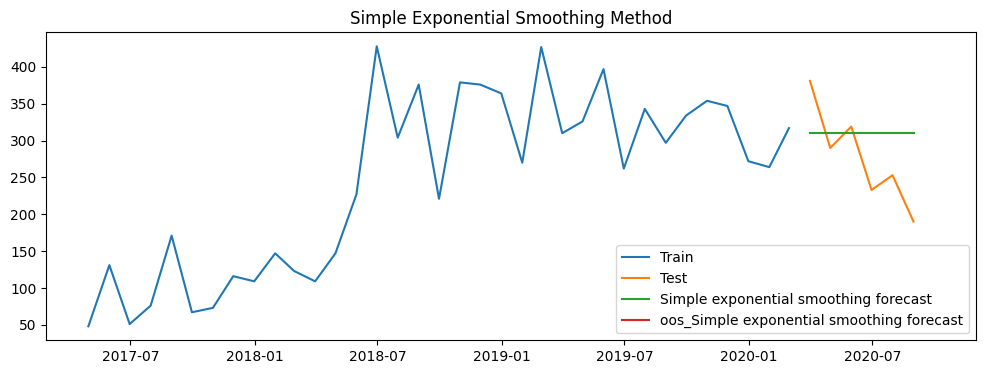

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.plot(y_hat_oos_ses['oos_ses_forecast'], label='oos_Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
  

In [105]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ses['ses_forecast'])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [106]:
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68


### 5. HOLT METHOD

#### a) Applying the Model
  

In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.394237197407044, 'smoothing_trend': 6.764436212332862e-06, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 63.12416958096299, 'initial_trend': 7.181566036993618, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [108]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

In [109]:
result = model_fit.forecast()
result

array([321.18084005])

In [110]:
y_hat_holt['holt_forecast']

MncVisiteDate
2020-03-31    321.180840
2020-04-30    328.362403
2020-05-31    335.543965
2020-06-30    342.725528
2020-07-31    349.907091
2020-08-31    357.088654
Name: holt_forecast, dtype: float64

In [111]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_test['TotalVisitedPatients']),seasonal_periods=12, trend='additive', seasonal=None)

model_tt_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.394237197407044, 'smoothing_trend': 6.764436212332862e-06, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 63.12416958096299, 'initial_trend': 7.181566036993618, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [112]:
y_hat_oos_holt = oosf.copy()
y_hat_oos_holt['oos_holt_forecast'] = model_tt_fit.predict(len(train_test) +1, (len(train_test) +oosf_months))

In [113]:
print(len(train_test)+ (oosf_months))
print(oosf_months)

42
1


In [114]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast
MncVisiteDate,,
2020-09-30,249.487805,248.054677


In [115]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    248.054677
Name: oos_holt_forecast, dtype: float64

In [116]:
ci = 100
upper_limit = y_hat_oos_holt['TotalVisitedPatients'] + ci
lower_imit  = y_hat_oos_holt['TotalVisitedPatients'] - ci

In [117]:
lower_imit

MncVisiteDate
2020-09-30    149.487805
Name: TotalVisitedPatients, dtype: float64

In [118]:
upper_limit

MncVisiteDate
2020-09-30    349.487805
Name: TotalVisitedPatients, dtype: float64

In [119]:
y_hat_oos_holt['upper_limit'] = y_hat_oos_holt['oos_holt_forecast'] + ci
y_hat_oos_holt['lower_imit'] = y_hat_oos_holt['oos_holt_forecast'] - ci

In [120]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast,upper_limit,lower_imit
MncVisiteDate,,,,
2020-09-30,249.487805,248.054677,348.054677,148.054677


In [121]:
y_hat_oos_holt['oos_holt_forecast']

MncVisiteDate
2020-09-30    248.054677
Name: oos_holt_forecast, dtype: float64

In [122]:
y_hat_oos_holt['upper_limit']

MncVisiteDate
2020-09-30    348.054677
Name: upper_limit, dtype: float64

In [123]:
y_hat_oos_holt

,TotalVisitedPatients,oos_holt_forecast,upper_limit,lower_imit
MncVisiteDate,,,,
2020-09-30,249.487805,248.054677,348.054677,148.054677


#### b) Plotting the graph
  

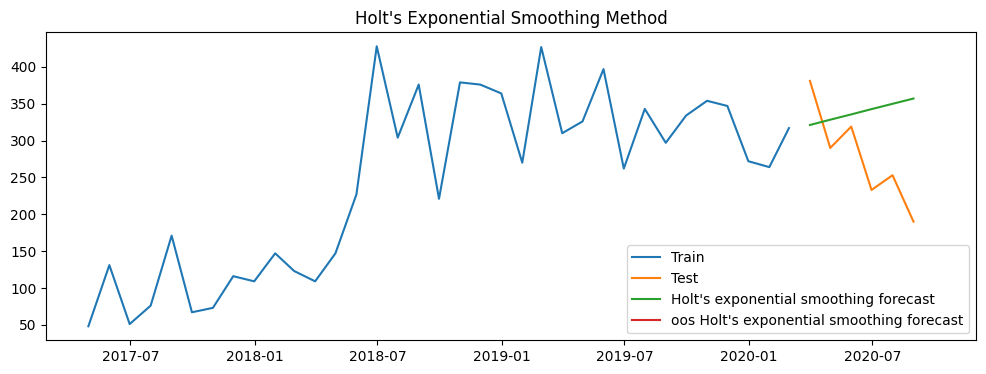

In [124]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(y_hat_oos_holt['oos_holt_forecast'], label='oos Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)



In [125]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_holt['holt_forecast'])/test['TotalVisitedPatients'])*100,2)

  #### d) Cumulative Results for MAPE

In [126]:
tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58


### 6. HOLT WINTERS ADDITIVE METHOD

#### a) Applying the Model

In [127]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)

{'smoothing_level': 0.4418575197638768, 'smoothing_trend': 0.0012259143675530356, 'smoothing_seasonal': 0.0018066422240136314, 'damping_trend': nan, 'initial_level': 68.44795365129657, 'initial_trend': 6.994090804583456, 'initial_seasons': array([-34.29503459,  36.17361188,  24.55967672,  12.10368044,
        46.02881956, -34.54327863,  19.70530056,  24.13990929,
       -14.5799991 , -43.03410783,  11.1037872 , -58.88358803]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [128]:
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

In [129]:
y_hat_hwa['hw_forecast'][-1]

403.82954612491193

#### b) Plotting the graph

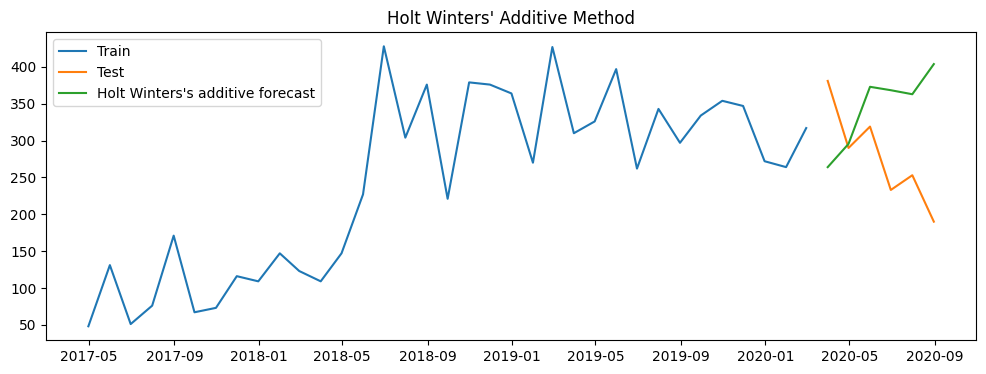

In [130]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [131]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwa['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [132]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94


### 7. HOLT WINTERS MULTIPLICATIVE METHOD

#### a) Applying the Model

In [133]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['TotalVisitedPatients']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
print(model_fit.summary)

{'smoothing_level': 0.7181091996550858, 'smoothing_trend': 0.031387655957876924, 'smoothing_seasonal': 0.23617623616969705, 'damping_trend': nan, 'initial_level': 76.85223535896209, 'initial_trend': 0.990656816276983, 'initial_seasons': array([2.05710921, 2.58257975, 3.01899382, 2.33933242, 2.29331632,
       2.53675416, 3.01141169, 2.46780537, 2.59504987, 2.12754201,
       3.3326311 , 2.39114758]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
<bound method HoltWintersResults.summary of <statsmodels.tsa.holtwinters.results.HoltWintersResults object at 0x7c6302a42d40>>


In [134]:
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

In [135]:
y_hat_hwm['hw_forecast'][-1]

309.3431968114056

#### b) Plotting the graph

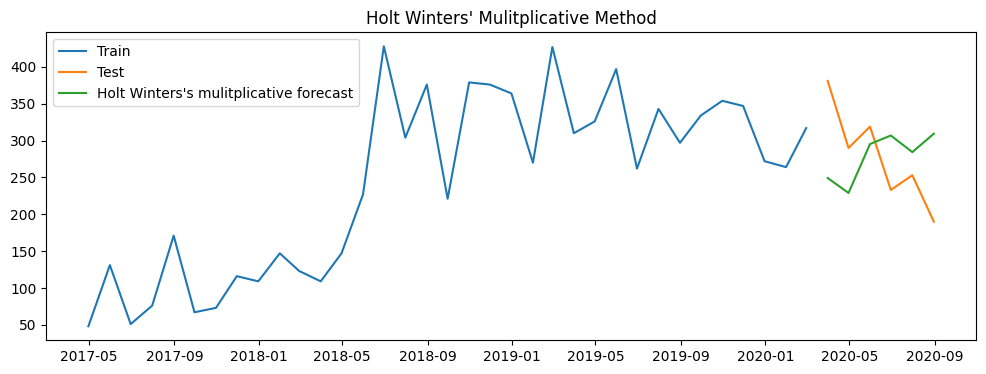

In [136]:
plt.figure(figsize=(12,4))
plt.plot( train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\mathrm{MAPE}=100N×∑i=1N∣∣∣xi−x^ixi∣∣∣
\end{equation}

In [137]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_hwm['hw_forecast'])/test['TotalVisitedPatients'])*100,2)

####d) Cumulative Results for MAPE

In [138]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34


### Regression Models

#### Stationary Test

In [139]:
# Stationarity test - KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(mnc_monthly['TotalVisitedPatients'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.558861
Critical Values @ 0.05: 0.46
p-value: 0.028410


#### Box Cox transformation to make variance constant

In [140]:
train.describe()

,TotalVisitedPatients
count,35.000000
mean,244.657143
std,120.476003
min,48.000000
25%,127.000000
50%,270.000000
75%,345.000000
max,428.000000


In [141]:
test.describe()

,TotalVisitedPatients
count,6.000000
mean,277.666667
std,67.568237
min,190.000000
25%,238.000000
50%,271.500000
75%,311.750000
max,381.000000


In [142]:
oosf.describe()

,TotalVisitedPatients
count,1.000000
mean,249.487805
std,NaN
min,249.487805
25%,249.487805
50%,249.487805
75%,249.487805
max,249.487805


In [143]:
mnc_monthly.describe()

,TotalVisitedPatients
count,42.000000
mean,249.487805
std,112.824085
min,48.000000
25%,147.000000
50%,267.000000
75%,340.750000
max,428.000000


#### Graph After Box Cox transform

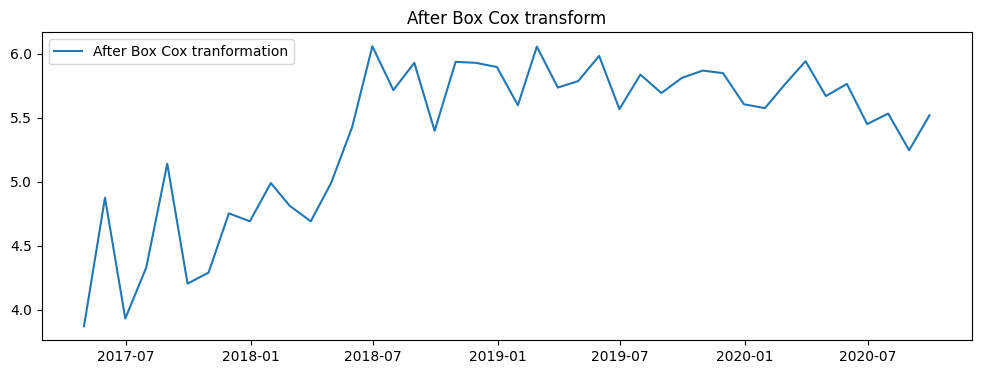

In [144]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(mnc_monthly['TotalVisitedPatients'], lmbda=0), index = mnc_monthly.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [145]:
data_boxcox

MncVisiteDate
2017-04-30    3.871201
2017-05-31    4.875197
2017-06-30    3.931826
2017-07-31    4.330733
2017-08-31    5.141664
2017-09-30    4.204693
2017-10-31    4.290459
2017-11-30    4.753590
2017-12-31    4.691348
2018-01-31    4.990433
2018-02-28    4.812184
2018-03-31    4.691348
2018-04-30    4.990433
2018-05-31    5.424950
2018-06-30    6.059123
2018-07-31    5.717028
2018-08-31    5.929589
2018-09-30    5.398163
2018-10-31    5.937536
2018-11-30    5.929589
2018-12-31    5.897154
2019-01-31    5.598422
2019-02-28    6.056784
2019-03-31    5.736572
2019-04-30    5.786897
2019-05-31    5.983936
2019-06-30    5.568345
2019-07-31    5.837730
2019-08-31    5.693732
2019-09-30    5.811141
2019-10-31    5.869297
2019-11-30    5.849325
2019-12-31    5.605802
2020-01-31    5.575949
2020-02-29    5.758902
2020-03-31    5.942799
2020-04-30    5.669881
2020-05-31    5.765191
2020-06-30    5.451038
2020-07-31    5.533389
2020-08-31    5.247024
2020-09-30    5.519410
dtype: float64

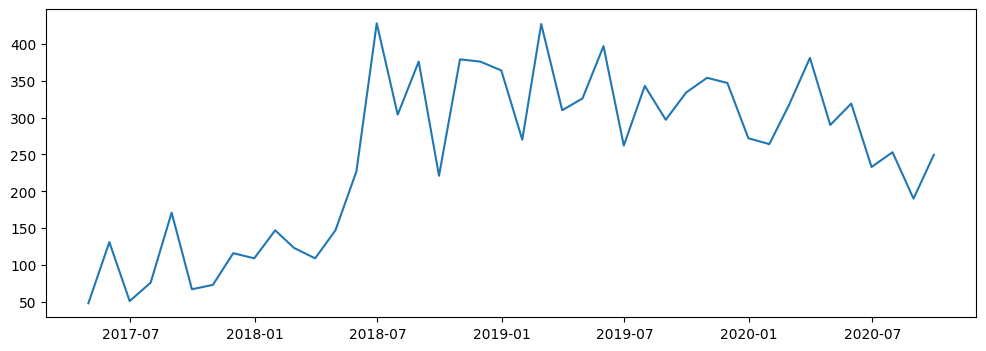

In [146]:
plt.figure(figsize=(12,4))
plt.plot( mnc_monthly['TotalVisitedPatients'], label='TotalVisitedPatients')

#### Adjusting mnc_len

In [147]:
mnc_len = mnc_monthly['TotalVisitedPatients']

#### Install pmdarima

In [148]:
# !pip install pmdarima

Differencing to Remove Trend

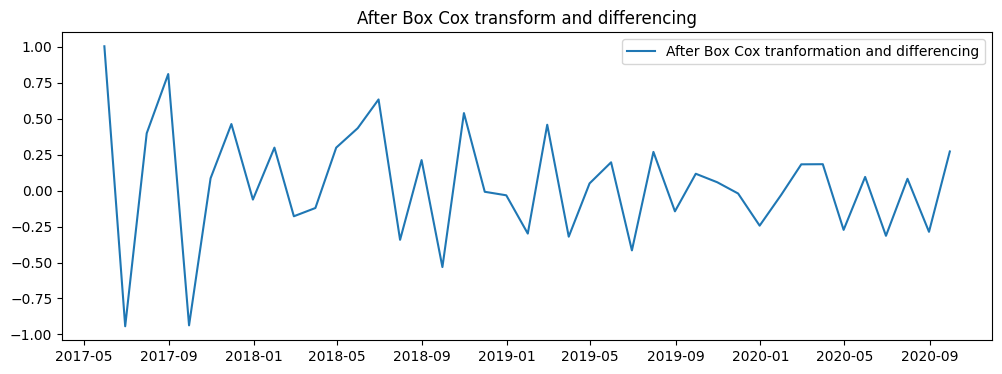

In [149]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), mnc_monthly.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [150]:
data_boxcox_diff.dropna(inplace=True)

In [151]:
train_data_boxcox = data_boxcox[:train_len] # Arima
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] # Rest
test_data_boxcox_diff = data_boxcox_diff[train_len:]

# Differencing and boxcox done on the entire data, hence need to split it again

In [152]:
test_data_boxcox_diff

MncVisiteDate
2020-04-30   -0.272918
2020-05-31    0.095310
2020-06-30   -0.314153
2020-07-31    0.082351
2020-08-31   -0.286365
2020-09-30    0.272386
dtype: float64

### 8. AR

#### a) Applying the Model
  

In [153]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params) # gives the intercept and coefficient values

const     0.048610
ar.L1    -0.513555
sigma2    0.132759
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [154]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we do a cumulative sum to remove the differencing and exponentiate the
# forecasts in order to remove the effect of the boxcox transformation

In [155]:
from datetime import timedelta
data_boxcox_diff.index.max()

Timestamp('2020-09-30 00:00:00')

In [156]:
y_hat_ar['ar_forecast'][-1]

298.42246139848714

#### b) Plotting the graph
  

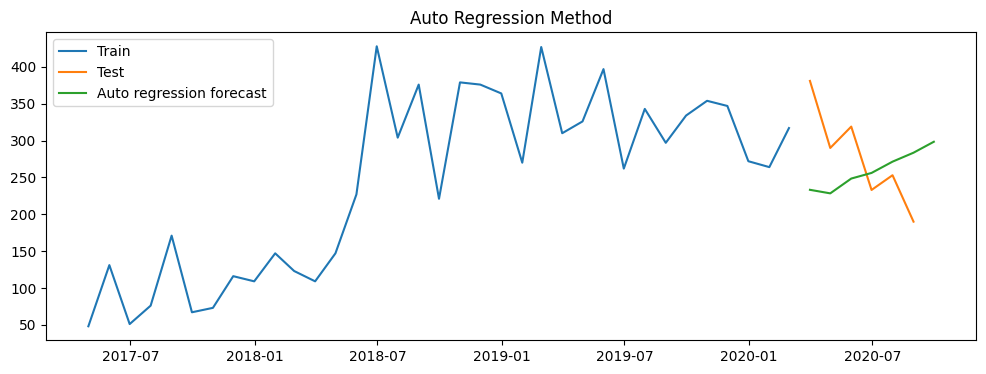

In [157]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}  

In [158]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [159]:
tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76


### 9. MA

#### a) Applying the Model
  

In [160]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(0, 0, 1))
model_fit = model.fit()

print(model_fit.params)
# Default parameters are 0,0,1
# Based on ACF and PACF plots, trying P =2, D =1, Q = 2

const     0.047671
ma.L1    -0.623787
sigma2    0.117507
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [161]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

In [162]:
y_hat_ma['ma_forecast'][-1]

280.2292374830245

#### b) Plotting the graph
  

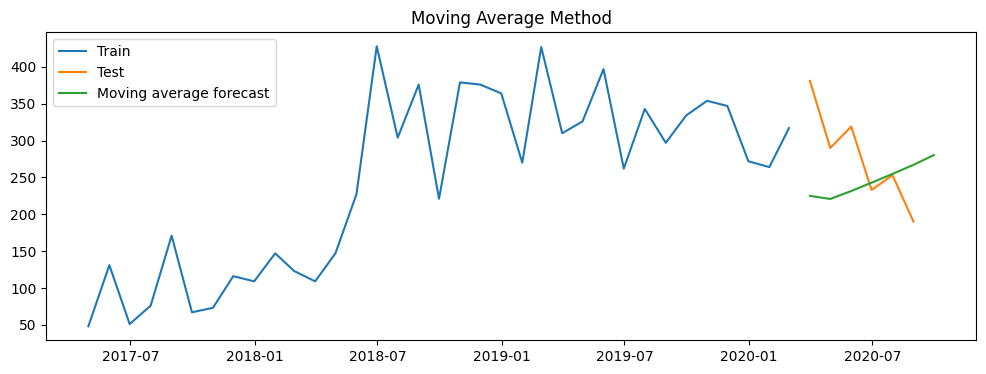

In [163]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}

In [164]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ma['ma_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [165]:
tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76
0,Moving Average (MA) method,22.96


### 11. ARMA

#### a) Applying the Model

In [166]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [167]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data_boxcox_diff, seasonal=False, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=34.841, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40.892, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=34.326, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32.235, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=33.495, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=32.968, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=32.847, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=30.876, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.195, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=32.347, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=32.044, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=34.960, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=33.165, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 2.137 seconds
                               SARIMAX Results  

In [168]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(2, 0, 0))
model_fit = model.fit()

print(model_fit.params)

const     0.047814
ar.L1    -0.672769
ar.L2    -0.427049
sigma2    0.111615
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [169]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

In [170]:
y_hat_arma['arma_forecast'][-1]

299.5514475828484

#### b) Plotting the graph
  

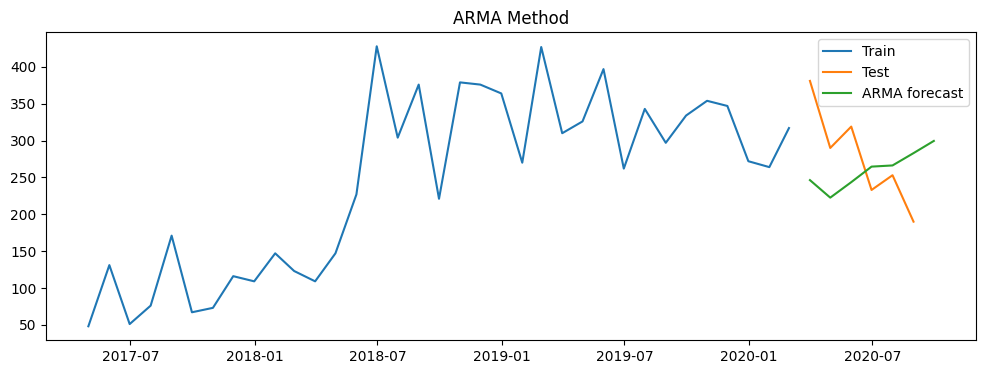

In [171]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}  

In [172]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_arma['arma_forecast'][train_len-1:])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [173]:
tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76
0,Moving Average (MA) method,22.96
0,Autoregressive moving average (ARMA) method,25.00


### 12. ARIMA

#### a) Applying the Model

In [174]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data_boxcox, order=(2, 1, 1))
model_fit = model.fit()

print(model_fit.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ar.L1    -0.889203
ar.L2    -0.500276
ma.L1     0.280366
sigma2    0.120869
dtype: float64


In [175]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

In [176]:
y_hat_arima['arima_forecast'][-1]

7.1617434343648675e+96

#### b) Plotting the graph
  

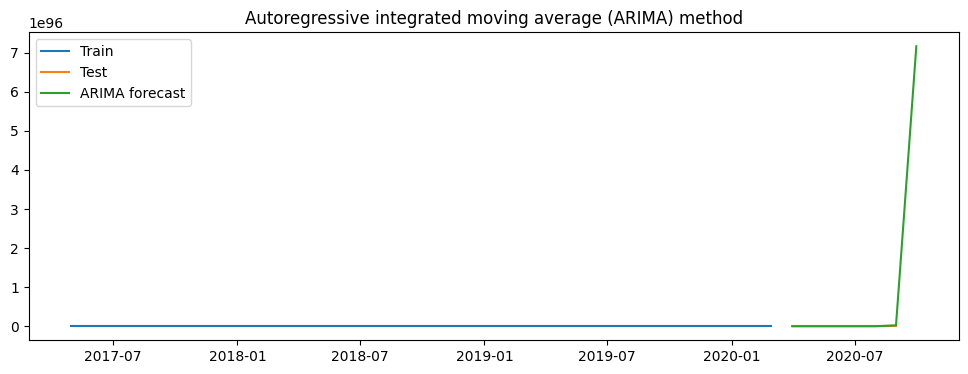

In [177]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}  

In [178]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_ar['ar_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [179]:
tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76
0,Moving Average (MA) method,22.96
0,Autoregressive moving average (ARMA) method,25.00


### 13. SARIMA

#### a) Applying the Model

In [180]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(2, 0, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()

print(model_fit.params)

ar.L1       0.488816
ar.L2       0.437017
ar.S.L12   -0.472374
sigma2      0.197051
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [181]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [182]:
y_hat_sarima['sarima_forecast'][-1]

333.14878066271376

#### b) Plotting the graph
  

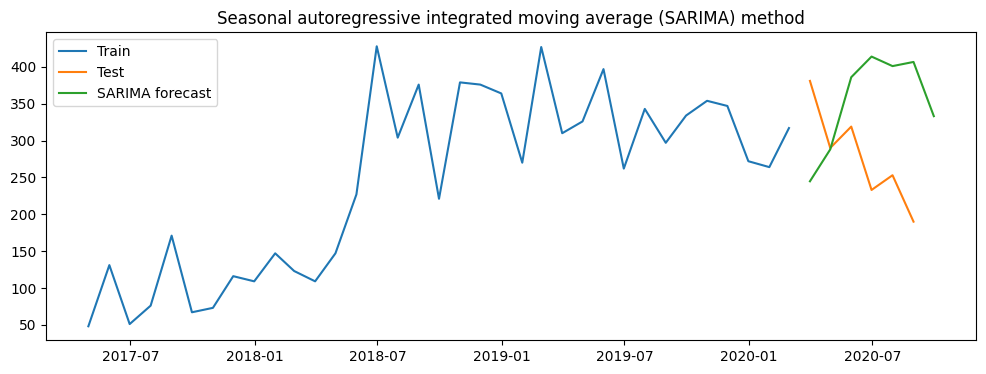

In [183]:
plt.figure(figsize=(12,4))
plt.plot(train['TotalVisitedPatients'], label='Train')
plt.plot(test['TotalVisitedPatients'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

#### c) Calculation for MAPE (Mean absolute percentage error)
\begin{equation}
\text{MAPE}(y, \hat{y}) = \frac{100\%}{N} \sum_{i=0}^{N - 1} \frac{y_i - \hat{y}_i}{y_i}.
\end{equation}

In [184]:
mape = np.round(np.mean(np.abs(test['TotalVisitedPatients']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['TotalVisitedPatients'])*100,2)

#### d) Cumulative Results for MAPE

In [185]:
tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76
0,Moving Average (MA) method,22.96
0,Autoregressive moving average (ARMA) method,25.00


# FINAL MAPE VALUES

In [186]:
print("Here are the calculated MAPE Values for respective methods for district 3")
results

Here are the calculated MAPE Values for respective methods for district 3


,Method,MAPE
0,Naive method,25.82
0,Simple average method,18.63
0,Simple moving average forecast,20.38
0,Simple exponential smoothing forecast,24.68
0,Holt's exponential smoothing method,34.58
0,Holt Winters' additive method,43.94
0,Holt Winters' multiplicative method,28.34
0,Autoregressive (AR) method,24.76
0,Moving Average (MA) method,22.96
0,Autoregressive moving average (ARMA) method,25.00
